In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime as dt

In [3]:
dfr = pd.read_csv('D:reported_numbers.csv',parse_dates=True)
dfi = pd.read_csv("D:incidence_per_1000_pop_at_risk.csv")
dfe = pd.read_csv("D:estimated_numbers.csv")

In [4]:
dfr.head()

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
3,Argentina,2017,0.0,1.0,Americas
4,Armenia,2017,0.0,NaN,Europe


In [5]:
dfe.head()

,Country,Year,No. of cases,No. of deaths,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,WHO Region
0,Afghanistan,2017,630308[495000-801000],298[110-510],630308,495000.0,801000.0,298,110.0,510.0,Eastern Mediterranean
1,Algeria,2017,0,0,0,NaN,NaN,0,NaN,NaN,Africa
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa
3,Argentina,2017,0,0,0,NaN,NaN,0,NaN,NaN,Americas
4,Armenia,2017,0,0,0,NaN,NaN,0,NaN,NaN,Europe


In [6]:

dfi.head()

,Country,Year,No. of cases,WHO Region
0,Afghanistan,2018,29.01,Eastern Mediterranean
1,Algeria,2018,0.00,Africa
2,Angola,2018,228.91,Africa
3,Argentina,2018,0.00,Americas
4,Armenia,2018,0.00,Europe


<AxesSubplot:xlabel='Year', ylabel='No. of deaths'>

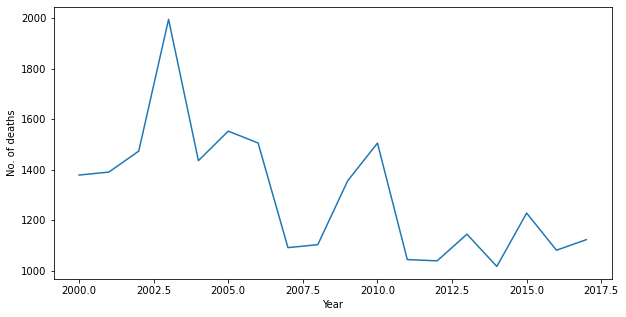

In [7]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year',y='No. of deaths',data=dfr)

<AxesSubplot:xlabel='Year', ylabel='No. of deaths_max'>

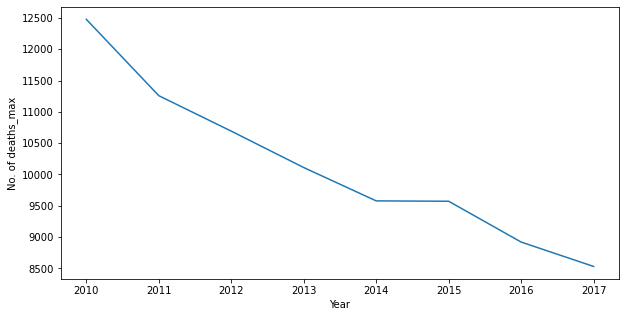

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year',y='No. of deaths_max',data=dfe)

<AxesSubplot:xlabel='Year', ylabel='No. of cases'>

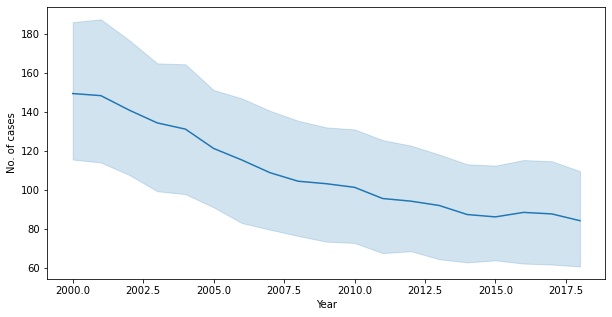

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year',y='No. of cases',data=dfi)

<AxesSubplot:>

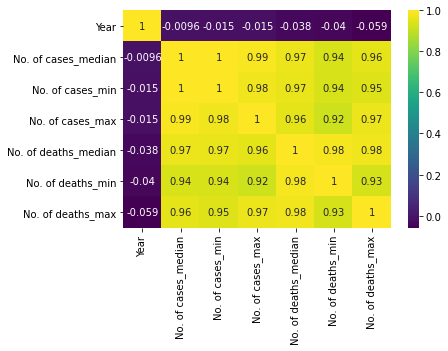

In [10]:
sns.heatmap(dfe.corr(),cmap='viridis',annot=True)

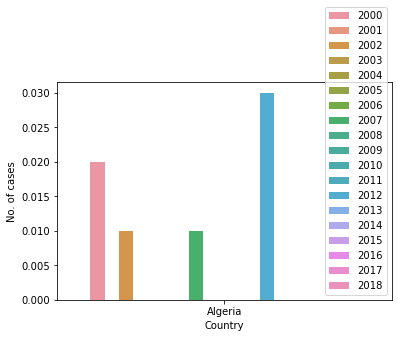

In [11]:
sns.barplot(x="Country",hue = "Year",y='No. of cases',data=dfi[dfi['Country']=="Algeria"])
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


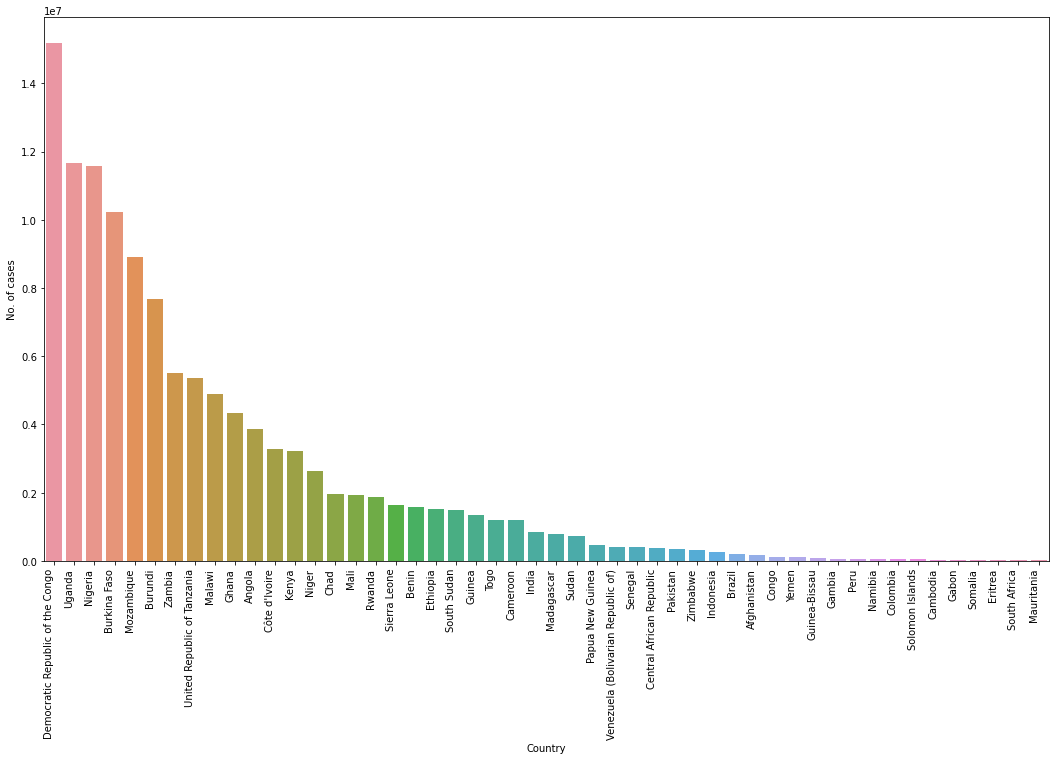

In [12]:
plt.figure(figsize=(18,10))
df1 = dfr.sort_values(by = 'No. of cases', ascending=False)
df1 = df1[df1['Year']==2017][:50]
sns.barplot(df1['Country'], df1['No. of cases'])
plt.xticks(rotation=90, ha='right');

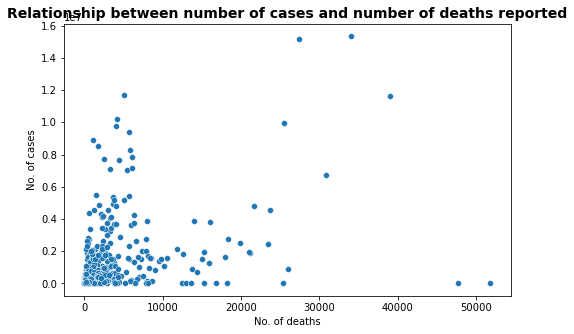

In [13]:
plt.figure(figsize =(8,5))
plt.title('Relationship between number of cases and number of deaths reported', fontsize=14, fontweight='bold')
ax =sns.scatterplot(x= 'No. of deaths', y ='No. of cases',data = dfr)

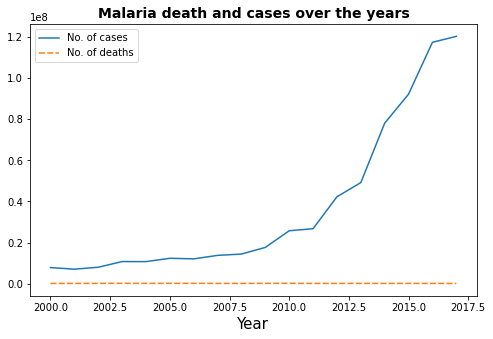

In [15]:
df4 =dfr.groupby('Year').sum().loc[:, ['No. of cases', 'No. of deaths']]
plt.figure(figsize =(8,5))
ax = sns.lineplot(data=df4)
plt.xlabel('Year', fontsize=15)
plt.title('Malaria death and cases over the years', fontsize=14, fontweight='bold')
plt.show()